In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("../data/apples_and_oranges.csv")
data

,Index,Weight,Size,Class
0,0,69,4.39,orange
1,1,69,4.21,orange
2,2,65,4.09,orange
3,3,72,5.85,apple
4,4,67,4.70,orange
5,5,73,5.68,apple
6,6,70,5.56,apple
7,7,75,5.11,apple
8,8,74,5.36,apple
9,9,65,4.27,orange


In [3]:
le = LabelEncoder()
data["Class"] = le.fit_transform(data["Class"])
data

,Index,Weight,Size,Class
0,0,69,4.39,1
1,1,69,4.21,1
2,2,65,4.09,1
3,3,72,5.85,0
4,4,67,4.70,1
5,5,73,5.68,0
6,6,70,5.56,0
7,7,75,5.11,0
8,8,74,5.36,0
9,9,65,4.27,1


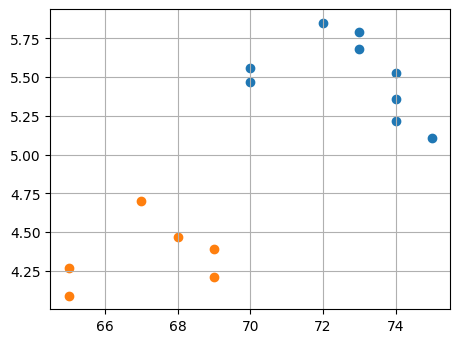

In [4]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(data[data["Class"] == 0]["Weight"], data[data["Class"] == 0]["Size"]) # Apple
ax.scatter(data[data["Class"] == 1]["Weight"], data[data["Class"] == 1]["Size"]) # Orange

ax.grid()

In [5]:
X = data[["Weight", "Size"]].values
y = data["Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
model = SVC(kernel="linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


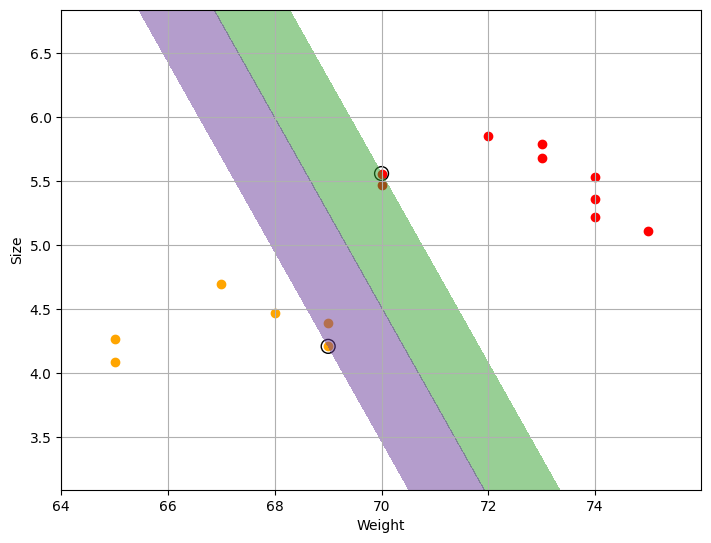

In [7]:
xx, yy = np.meshgrid(np.arange(data["Weight"].min() - 1, data["Weight"].max() + 1, 0.01),
                     np.arange(data["Size"].min() - 1, data["Size"].max() + 1, 0.01))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(data[data["Class"] == 0]["Weight"], data[data["Class"] == 0]["Size"], facecolor="red") # Apple
ax.scatter(data[data["Class"] == 1]["Weight"], data[data["Class"] == 1]["Size"], facecolor="orange") # Orange
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolor="none", edgecolors="k")
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, levels=[-1, 0, 1], alpha=0.5)

ax.set_xlabel("Weight")
ax.set_ylabel("Size")
ax.grid()